# 1. Find-S

In [15]:
import numpy as np
import pandas as pd
H = [0, 0, 0, 0, 0, 0]
df = pd.read_csv("finds.csv", sep=",", header=None)
print(df)
attribute = np.array(df)[:, :-1]
print(attribute)
target = np.array(df)[:, -1]
print(target)
for i in range(len(df)):
    for j in range(len(df.columns) - 1):
        if df.iloc[i, -1] == "Yes":
            if H[j] == 0:
                H[j] = df.iloc[i, j]
            elif df.iloc[i, j] != H[j]:
                H[j] = '?'
print(H)

       0     1       2       3     4       5    6
0  Sunny  Warm  Normal  Strong  Warm    Same  Yes
1  Sunny  Warm    High  Strong  Warm    Same  Yes
2  Rainy  Cold    High  Strong  Warm  Change   No
3  Sunny  Warm    High  Strong  Cool  Change  Yes
[['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
 ['Sunny' 'Warm' 'High' 'Strong' 'Warm' 'Same']
 ['Rainy' 'Cold' 'High' 'Strong' 'Warm' 'Change']
 ['Sunny' 'Warm' 'High' 'Strong' 'Cool' 'Change']]
['Yes' 'Yes' 'No' 'Yes']
['Sunny', 'Warm', '?', 'Strong', '?', '?']


# 2. Candidate Elimination

In [8]:
import pandas as pd
df=pd.read_csv("finds.csv",sep=",",header=None)
#Intialize S and G
S=[0,0,0,0,0,0]
G=list()
for i in range(len(df.columns)-1):
    G.append(['?','?','?','?','?','?'])
#Read samples
for i in range(len(df)):
    for j in range(len(df.columns)-1):
        if df.iloc[i,-1]=="Yes":
            if S[j]==0:
                S[j]=df.iloc[i,j]
            elif df.iloc[i,j]!=S[j]:
                S[j]="?"
            if G[j][j]!='?' and S[j]=='?':
                G[j][j]='?'
        else:
            if df.iloc[i,j]!=S[j] and S[j]!='?':
                G[j][j]=S[j]
print(S)
print(G)

['Sunny', 'Warm', '?', 'Strong', '?', '?']
[['Sunny', '?', '?', '?', '?', '?'], ['?', 'Warm', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]


# 3. Decision Tree

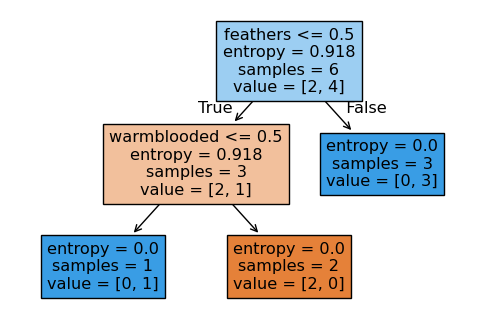

Number of features in training data: 4
[0]


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [9]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree

# Load the data
df = pd.read_csv("decision_tree1.csv", sep=",")

# Encode categorical features as numeric codes
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')
        df[col] = df[col].cat.codes

# Prepare the feature matrix and target vector
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Train the Decision Tree classifier
model = DecisionTreeClassifier(criterion="entropy")
clf = model.fit(x, y)

# Plot the tree
plt.figure(figsize=(6,4))
tree.plot_tree(clf, feature_names=x.columns.tolist(), filled=True)
plt.show()

# Verify the number of features in the training data
print(f"Number of features in training data: {x.shape[1]}")

# Adjust new_data to have the same number of features
# Replace the list with the appropriate number of features for your dataset
new_data = [[1, 0, 0, 1]]  # Example adjustment

# Predict using new data
ypred = clf.predict(new_data)
print(ypred)

# 4. Back Propagation

In [13]:
import numpy as np

X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)
X = X/np.amax(X,axis=0) #maximum of X array longitudinally
y = y/100
def sigmoid (x):
    return 1/(1 + np.exp(-x))
def derivatives_sigmoid(x):
    return x * (1 - x)
epoch=5
lr=0.1
inputlayer_neurons = 2 
hiddenlayer_neurons = 3 
output_neurons = 1 
wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
bh=np.random.uniform(size=(1,hiddenlayer_neurons))
wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))
bout=np.random.uniform(size=(1,output_neurons))
for i in range(epoch):
    #Forward Propogation
    hinp1=np.dot(X,wh)
    hinp=hinp1 + bh
    hlayer_act = sigmoid(hinp)
    outinp1=np.dot(hlayer_act,wout)
    outinp= outinp1+bout
    output = sigmoid(outinp)
    #Backpropagation
    EO = y-output
    outgrad = derivatives_sigmoid(output)
    d_output = EO * outgrad
    EH = d_output.dot(wout.T)
    hiddengrad = derivatives_sigmoid(hlayer_act)
    d_hiddenlayer = EH * hiddengrad
    wout += hlayer_act.T.dot(d_output) *lr   
    wh += X.T.dot(d_hiddenlayer) *lr
    print ("-----------Epoch-", i+1, "Starts----------")
    print("Input: \n" + str(X)) 
    print("Actual Output: \n" + str(y))
    print("Predicted Output: \n" ,output)
    print ("-----------Epoch-", i+1, "Ends----------\n")
print("Input: \n" + str(X)) 
print("Actual Output: \n" + str(y))
print("Predicted Output: \n" ,output)

-----------Epoch- 1 Starts----------
Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.7810096 ]
 [0.76301584]
 [0.77878562]]
-----------Epoch- 1 Ends----------

-----------Epoch- 2 Starts----------
Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.78266367]
 [0.76453829]
 [0.78042673]]
-----------Epoch- 2 Ends----------

-----------Epoch- 3 Starts----------
Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.78427848]
 [0.76602596]
 [0.78202908]]
-----------Epoch- 3 Ends----------

-----------Epoch- 4 Starts----------
Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.78585536]
 [0.76748001]
 [0.783

# 5. Naive Bayes

In [14]:
import pandas as pd
df=pd.read_csv("iris1.csv")
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
y=y.astype('category')
y=y.cat.codes
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)
from sklearn.naive_bayes import GaussianNB
g=GaussianNB()
g.fit(xtrain,ytrain)
ypred=g.predict(xtest)
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred))

1.0


# 6. Bayesian Belief Network

In [16]:
import pandas as pd
import numpy as np
from pgmpy.inference import VariableElimination
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator
df=pd.read_csv("Medical Dataset.csv")
df=df.replace("?",np.nan)
model=BayesianModel([('age','heartdisease'),('sex','heartdisease'),
('exang','heartdisease'),('cp','heartdisease'),
('heartdisease','restecg'),('heartdisease','chol')])
model.fit(df,estimator=MaximumLikelihoodEstimator)
infer=VariableElimination(model)
q=infer.query(variables=['heartdisease'],evidence={'restecg':1})
print(q)

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |              0.1016 |
+-----------------+---------------------+
| heartdisease(1) |              0.0000 |
+-----------------+---------------------+
| heartdisease(2) |              0.2361 |
+-----------------+---------------------+
| heartdisease(3) |              0.2017 |
+-----------------+---------------------+
| heartdisease(4) |              0.4605 |
+-----------------+---------------------+


# 7. E-M Algorithm

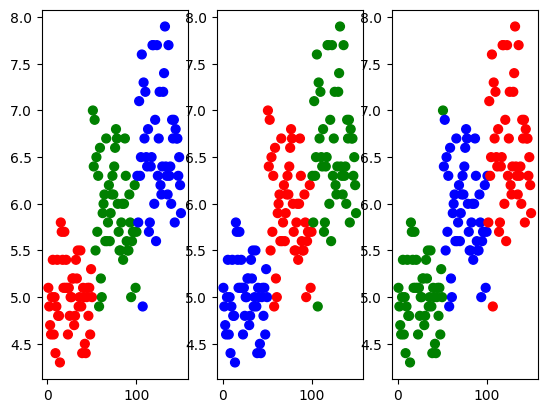

In [17]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
df=pd.read_csv('Iris.csv')
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
colormap=np.array(["red","green","blue"])
y=y.astype('category')
y=y.cat.codes
gm=GaussianMixture(n_components=3)
gm.fit(x)
gmc=gm.predict(x)
km=KMeans(n_clusters=3)
km.fit(x)
kmc=km.predict(x)
import matplotlib.pyplot as plt
plt.subplot(1,3,1)
plt.scatter(x.iloc[:,0],x.iloc[:,1],c=colormap[y],s=40)
plt.subplot(1,3,2)
plt.scatter(x.iloc[:,0],x.iloc[:,1],c=colormap[gmc],s=40)
plt.subplot(1,3,3)
plt.scatter(x.iloc[:,0],x.iloc[:,1],c=colormap[kmc],s=40)
plt.show()

# 8. K-Neighbor/Nearest

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
df=pd.read_csv('Iris.csv')
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
y=y.astype('category')
y=y.cat.codes
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)
kn=KNeighborsClassifier(n_neighbors=3)
kn.fit(xtrain,ytrain)
ypred=kn.predict(xtest)
i=0
for label in ytest:
    if label==ypred[i]:
        print('Correct',label)
    else:
        print('Incorrect',label,ypred[i])

Correct 1
Incorrect 0 1
Incorrect 0 1
Incorrect 2 1
Incorrect 0 1
Correct 1
Correct 1
Correct 1
Incorrect 2 1
Incorrect 2 1
Correct 1
Incorrect 2 1
Incorrect 2 1
Incorrect 0 1
Incorrect 2 1
Correct 1
Correct 1
Incorrect 0 1
Incorrect 2 1
Incorrect 0 1
Incorrect 2 1
Incorrect 0 1
Correct 1
Incorrect 0 1
Correct 1
Incorrect 2 1
Incorrect 0 1
Correct 1
Incorrect 0 1
Incorrect 2 1
Incorrect 0 1
Incorrect 2 1
Incorrect 2 1
Incorrect 2 1
Incorrect 2 1
Incorrect 2 1
Incorrect 2 1
Incorrect 0 1
Incorrect 2 1
Incorrect 2 1
Incorrect 0 1
Correct 1
Incorrect 0 1
Correct 1
Incorrect 2 1


# 9. Regression

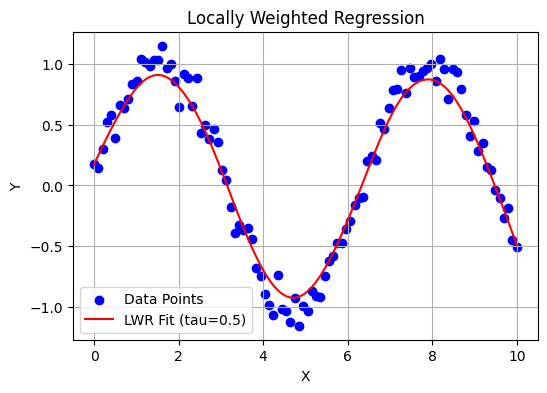

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Locally Weighted Regression (LWR) Function
def locally_weighted_regression(x_query, X, y, tau=0.1):
    X = np.array(X)
    y = np.array(y)
    x_query = np.array(x_query)
    
    # Gaussian kernel function
    kernel_weights = np.exp(-(X - x_query)**2 / (2 * tau**2))
    
    W = np.diag(kernel_weights)
    
    # Add an intercept term to X for the constant coefficient
    X_design = np.vstack([X, np.ones_like(X)]).T
    
    # Perform locally weighted linear regression
    theta = np.linalg.inv(X_design.T @ W @ X_design) @ (X_design.T @ W @ y)
    
    # Prediction at x_query
    y_query = np.array([x_query, 1]).T @ theta
    
    return y_query

# Generate Synthetic Data
np.random.seed(0)
X = np.linspace(0, 10, 100)
y = np.sin(X) + np.random.normal(0, 0.1, X.shape)

# Apply LWR and Predict
x_queries = np.linspace(0, 10, 100)
y_pred = [locally_weighted_regression(x, X, y, tau=0.5) for x in x_queries]

# Plot Results
plt.figure(figsize=(6, 4))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(x_queries, y_pred, color='red', label='LWR Fit (tau=0.5)')
plt.title('Locally Weighted Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


# 10. SVM

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
iris=pd.read_csv("Iris.csv")
x=iris.iloc[:,:-1]
y=iris.iloc[:,-1]
y=y.astype('category')
y=y.cat.codes
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)
svmclf=make_pipeline(StandardScaler(),LinearSVC(C=15))
svmclf.fit(xtrain,ytrain)
ypred=(svmclf.predict(xtest))
acc=accuracy_score(ytest,ypred)
print(acc)

0.9555555555555556
